# Image registration

Here we detect the 2 subimages from a larger image and perform image registration to align the patterns.

In [37]:
## Preamble (import ing the required libraries)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

import diff_spotter as ds
from importlib import reload

# for plotting
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})

# plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')
plt.rc('pdf',fonttype=42)

import seaborn as sns
sns.mpl.rc('figure', figsize = (14, 8))
sns.set_context(
    'notebook', font_scale=2.5, rc={'lines.linewidth': 2.5})

## 1. Registration from 2 images

This is the simplest case: we align the images (registration) from already selected images on a scanned image (HP simple scanner), so that they are flat.


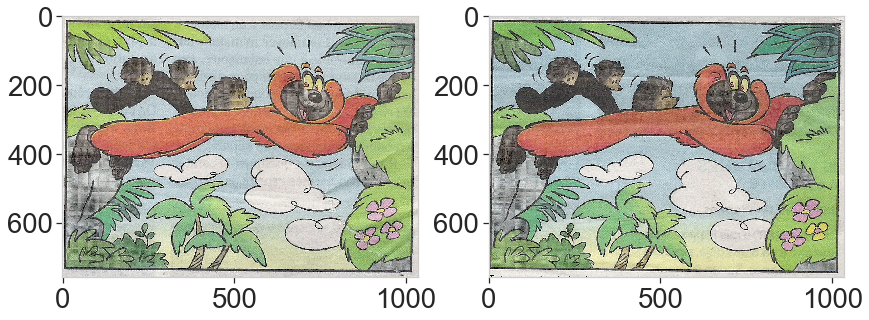

In [39]:
reload(ds)

# Read and display the 2 images

# 1, 2, 3, 6, or 8
image_name = 'data/diff1'

img_a = cv2.imread(image_name+'_a.png')
img_b = cv2.imread(image_name+'_b.png')

ds.display_2img(img_a, img_b)

We aligne the two images on top of each other.

In this first step, we start from two scanned images, so the transformation will be limited to a translation.

In [40]:
reload(ds)
img_a_aligned, img_b_aligned = ds.align_images(img_a, img_b)

# to avoid having black frame around diff images
img_a_aligned[img_b_aligned[:, :, :] == 0] = 0

In [41]:
# save the two aligned images

cv2.imwrite(image_name+'_a_aligned.png', img_a_aligned)
cv2.imwrite(image_name+'_b_aligned.png', img_b_aligned)

True

In [42]:
reload(ds)

# do it for all images
for n in ['1', '2', '3', '6', '8']:
    image_name = 'data/diff'+n
    
    ds.register_flat(image_name)

## 2. Detect the 2 images

We complicate the situation in this section: the 2 images are in a larger image. We need to detect them and extract them.

Ideas:
- template matching
- feature detection and matching
- lower resolution + matching
- sub area exctraction and matching (1/8)


In [ ]:
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized = cv2.medianBlur(resized, 5)

display(resized)

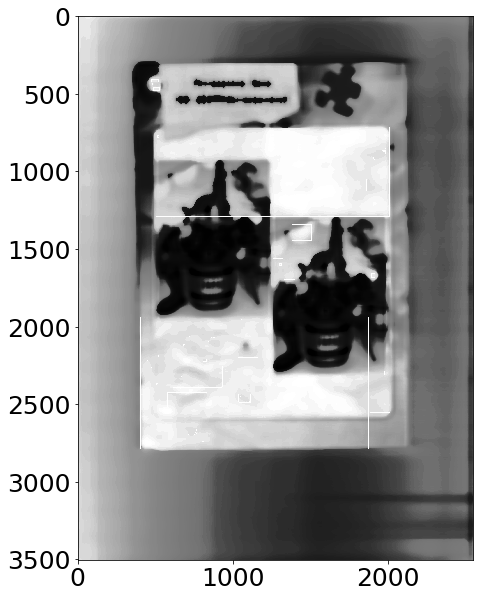

In [1117]:
img_cont = img.copy()

ret,binary = cv2.threshold(img,230,255,1)
 
_,contours,h = cv2.findContours(binary,1,2) 

for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(img_cont, (x,y), (x+w,y+h), (255,0,0), 2)

display_img(img_cont)

